In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from keras.regularizers import l2





In [2]:
data = pd.read_csv('/content/diabetes_binary.csv')

In [3]:
df = data.copy()
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


<ipython-input-7-03391df33699>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df.columns, rotation=90)


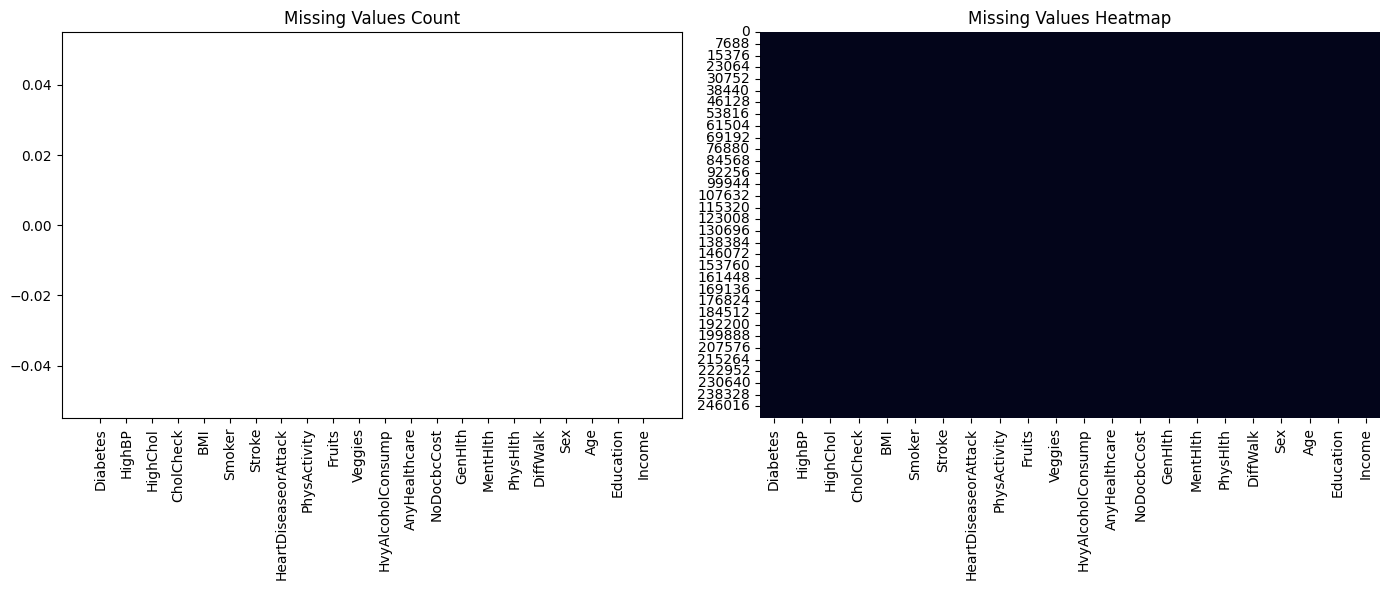

In [7]:
# Create subplots to visualize side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1st subplot: showing the count of missing values
ax[0].bar(df.columns, df.isnull().sum())
ax[0].set_title('Missing Values Count')
ax[0].set_xticklabels(df.columns, rotation=90)

# 2nd subplot: heatmap showing missing values
sns.heatmap(df.isnull(), cbar=False, ax=ax[1])
ax[1].set_title('Missing Values Heatmap')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
df.nunique()


,0
Diabetes,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
for i in df.columns:
  print(i, df[i].unique())

Diabetes [0 1]
HighBP [1 0]
HighChol [1 0]
CholCheck [1 0]
BMI [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker [1 0]
Stroke [0 1]
HeartDiseaseorAttack [0 1]
PhysActivity [0 1]
Fruits [0 1]
Veggies [1 0]
HvyAlcoholConsump [0 1]
AnyHealthcare [1 0]
NoDocbcCost [0 1]
GenHlth [5 3 2 4 1]
MentHlth [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk [1 0]
Sex [0 1]
Age [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education [4 6 3 5 2 1]
Income [3 1 8 6 4 7 2 5]


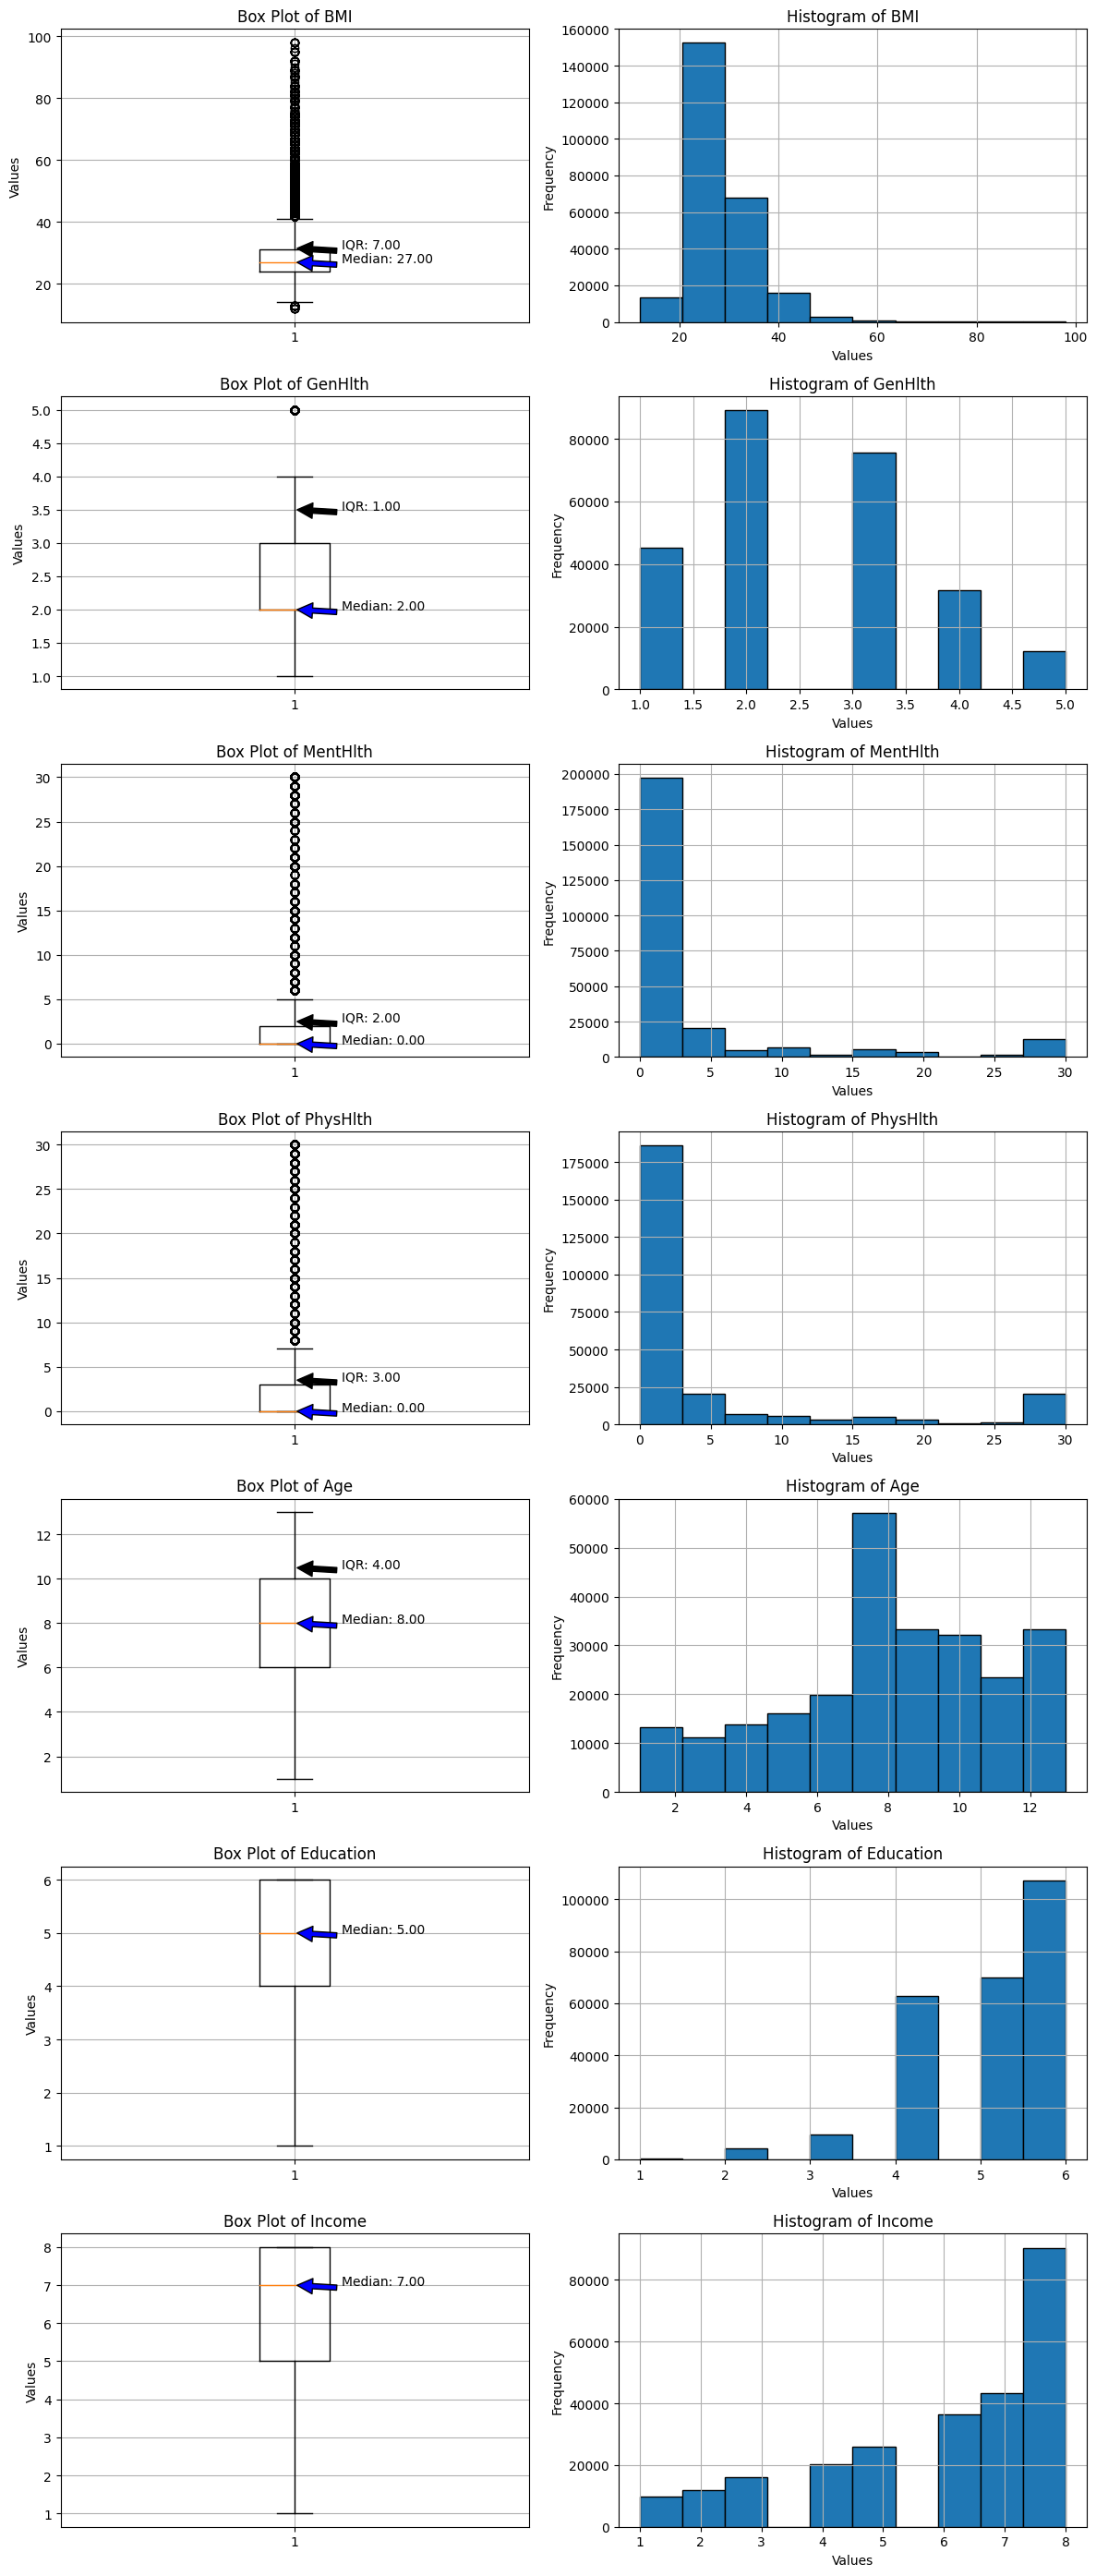

In [ ]:
analyses_df1 = df[['BMI','GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']]

# Function to calculate IQR and annotate boxplot and histogram
def plot_boxplot_with_iqr_median_and_histogram(dataframe):
    # Create subplots: 2 rows for each column (boxplot and histogram)
    fig, axs = plt.subplots(len(dataframe.columns), 2, figsize=(12, len(dataframe.columns) * 4))

    for i, column in enumerate(dataframe.columns):
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and the median (50th percentile)
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        median = dataframe[column].median()
        IQR = Q3 - Q1

        # Box plot
        axs[i, 0].boxplot(dataframe[column])
        axs[i, 0].set_title(f'Box Plot of {column}')

        # Annotating the IQR
        axs[i, 0].annotate(f'IQR: {IQR:.2f}', xy=(1, Q3 + 0.5), xytext=(1.1, Q3 + 0.5),
                        arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotating the median
        axs[i, 0].annotate(f'Median: {median:.2f}', xy=(1, median), xytext=(1.1, median),
                        arrowprops=dict(facecolor='blue', shrink=0.05))

        # Add grid and set y-axis label for box plot
        axs[i, 0].grid(True)
        axs[i, 0].set_ylabel('Values')

        # Histogram
        axs[i, 1].hist(dataframe[column], bins=10, edgecolor='black')
        axs[i, 1].set_title(f'Histogram of {column}')
        axs[i, 1].set_xlabel('Values')
        axs[i, 1].set_ylabel('Frequency')
        axs[i, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Call the function
plot_boxplot_with_iqr_median_and_histogram(analyses_df1)


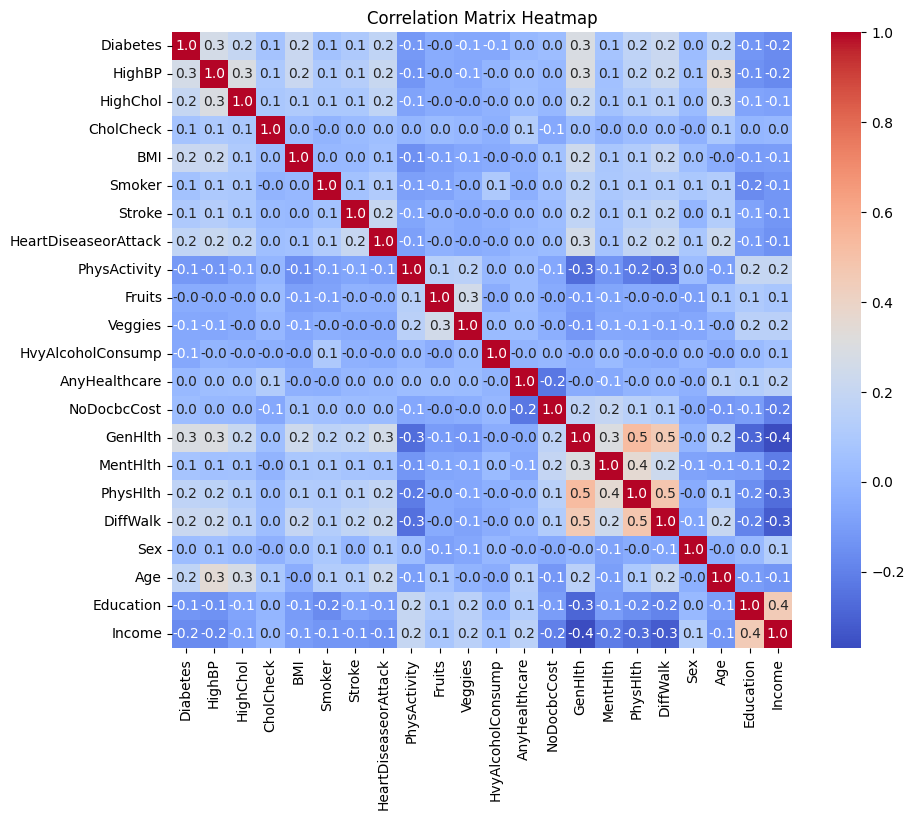

In [30]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
df['Diabetes'].value_counts()

,count
Diabetes,
0,218334
1,35346


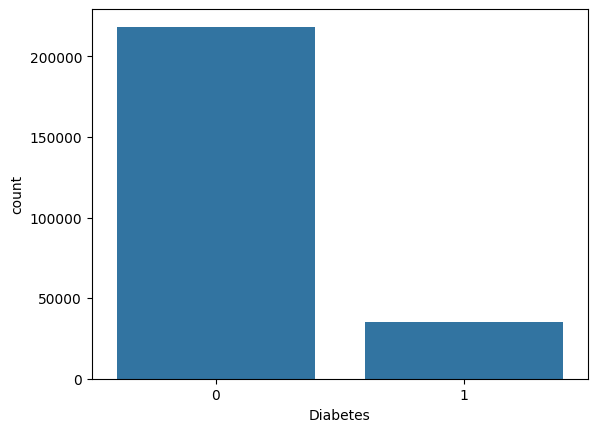

In [ ]:
# Assuming you want to create a barplot of a column in your dataframe 'df'
sns.countplot(x='Diabetes', data=df)
plt.show() # Display the plot

In [8]:
X = df.drop('Diabetes',axis = 1)
y = df['Diabetes']

In [9]:
from imblearn.under_sampling import RandomUnderSampler

# Random Under-sampler tətbiqi
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Resampled verilənlərin forma məlumatı
print(f"Original dataset shape: {X.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}")


Original dataset shape: (253680, 21)
Resampled dataset shape: (70692, 21)


In [10]:
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [12]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Feature selection

Multicollinearity



*   VIF = 1: Dəyişənin başqaları ilə əlaqəsi yoxdur.

*   1 < VIF < 5: Dəyişənlər arasında mülayim bir əlaqə var.

*   VIF ≥ 5: Dəyişənlər arasında yüksək bir əlaqə var, bu da multicollinearity-nin potensial problemi olduğunu göstərə bilər.

*   VIF > 10: Bu, multicollinearity-nin ciddi bir problem olduğunu göstərir və bu zaman dəyişənin modeldən çıxarılması düşünülə bilər.










In [13]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_resampled.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 feature        VIF
0                 HighBP   2.299761
1               HighChol   2.029660
2              CholCheck  23.187436
3                    BMI  18.149913
4                 Smoker   1.933042
5                 Stroke   1.126777
6   HeartDiseaseorAttack   1.289820
7           PhysActivity   4.645314
8                 Fruits   3.032775
9                Veggies   5.826886
10     HvyAlcoholConsump   1.083523
11         AnyHealthcare  20.839710
12           NoDocbcCost   1.215834
13               GenHlth  10.740162
14              MentHlth   1.463103
15              PhysHlth   1.999556
16              DiffWalk   1.838551
17                   Sex   1.910708
18                   Age   9.886830
19             Education  29.507416
20                Income  14.156118


                 Feature  Importance
0                 HighBP    0.274992
13               GenHlth    0.251948
3                    BMI    0.114591
1               HighChol    0.099569
18                   Age    0.081525
16              DiffWalk    0.066926
6   HeartDiseaseorAttack    0.032084
15              PhysHlth    0.025411
20                Income    0.025281
19             Education    0.008323
7           PhysActivity    0.005782
2              CholCheck    0.004227
10     HvyAlcoholConsump    0.003094
5                 Stroke    0.001862
14              MentHlth    0.001535
17                   Sex    0.001343
4                 Smoker    0.000738
9                Veggies    0.000272
8                 Fruits    0.000196
11         AnyHealthcare    0.000168
12           NoDocbcCost    0.000135


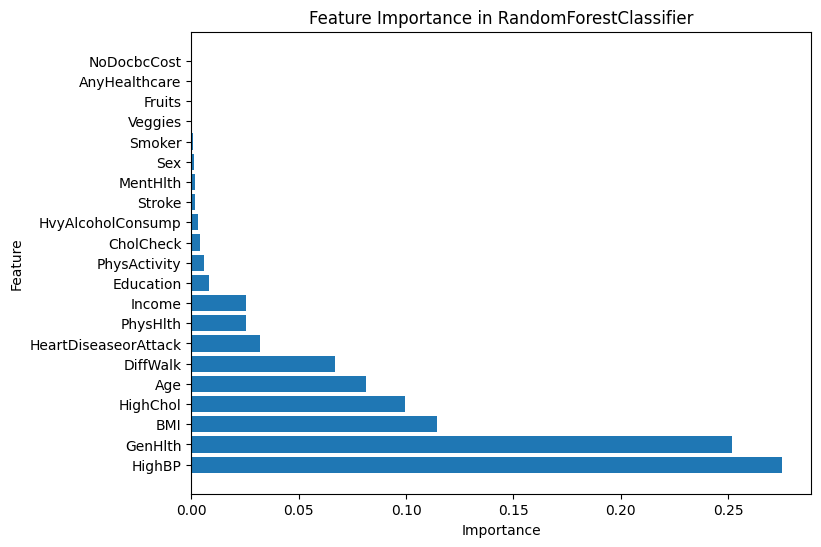

In [20]:
# feature importance with tree base
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
model.fit(X_train_scaled, y_train)

feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.title('Feature Importance in RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Original features: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Selected features: Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Age'], dtype='object')


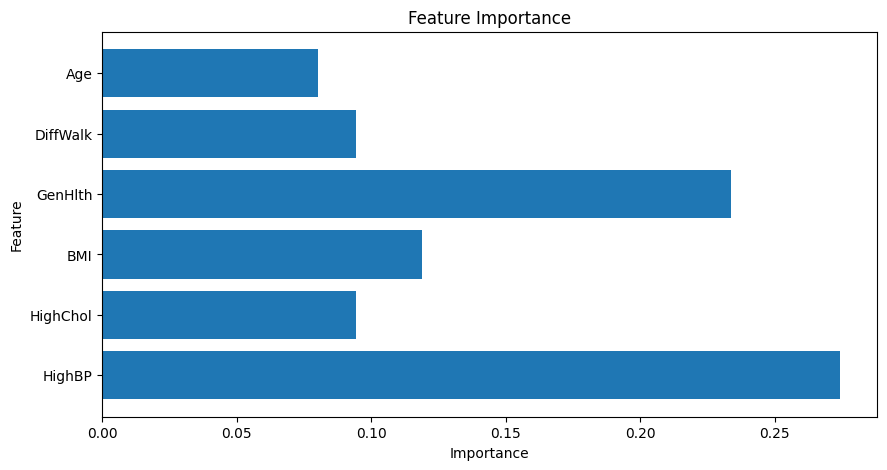

In [ ]:
# feature selection
# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train_scaled, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train_scaled)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
original_features = X_train_scaled.columns
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel
features_bool = model.get_support()

selected_features = original_features[features_bool]
print(f"\nSelected features: {selected_features}")

feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})
plt.figure(figsize=(10, 5))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

CholCheck               1.152553
GenHlth                 1.141286
HighBP                  0.762985
HvyAlcoholConsump       0.738772
Age                     0.593100
BMI                     0.566887
HighChol                0.565627
Sex                     0.267287
Income                  0.238029
HeartDiseaseorAttack    0.213261
Stroke                  0.152430
DiffWalk                0.112082
Education               0.063147
Veggies                 0.054997
AnyHealthcare           0.044998
PhysHlth                0.038060
PhysActivity            0.035856
Fruits                  0.027698
NoDocbcCost             0.010538
MentHlth                0.008316
Smoker                  0.002010
dtype: float64


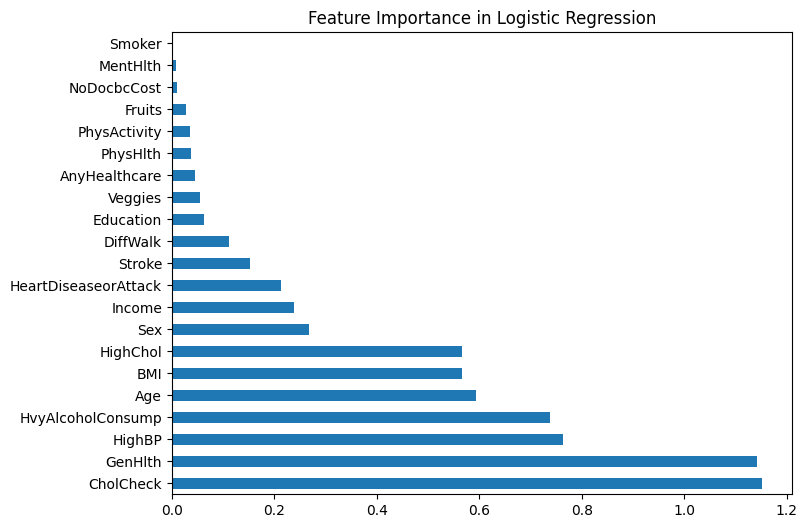

In [ ]:
# Logistic Regression model
model_log = LogisticRegression()
model_log.fit(X_train_scaled, y_train)

# Xüsusiyyətlərin adları
feature_names = X_train_scaled.columns

# Modelin koeffisiyentləri (loq-odds)
coefficients = model_log.coef_[0]


# Feature importance vizualizasiyası
importance = pd.Series(np.abs(coefficients), index=feature_names)

# Əhəmiyyətliliyi azdan çoxa doğru sıralamaq
importance = importance.sort_values(ascending=False)
print(importance)

# Plot
plt.figure(figsize=(8, 6))
importance.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression')
plt.show()

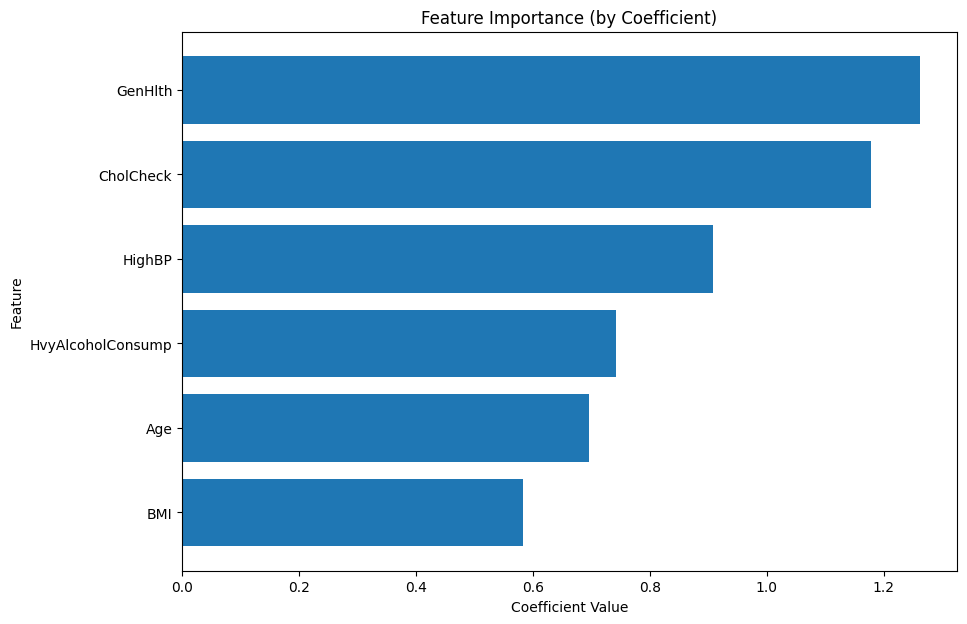

In [ ]:
# Recursive Feature Elimination (RFE) to select top 6 features
rfe = RFE(model_log, n_features_to_select=6)
fit = rfe.fit(X_train_scaled, y_train)

# Extract coefficients for the selected features
selected_features = X_train.columns[fit.support_]

coefficients = model_log.fit(X_train_scaled.loc[:, fit.support_], y_train).coef_[0]

# Create a DataFrame for selected features and their corresponding coefficients
importance_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': np.abs(coefficients)})

# Sort by coefficient for better visualization
importance_df = importance_df.sort_values(by='Coefficient', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.barh(importance_df["Feature"], importance_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (by Coefficient)")
plt.show()

###Modeling and Evaluation


Logistic regression

    Classification metrics

    1. Accuracy (Dəqiqlik)
    Tərif: Modelin düzgün təsnif etdiyi müşahidələrin ümumi müşahidələrə olan nisbətidir.
    
    İstifadə: Modelin nə qədər düzgün olduğunu göstərir, lakin balanssız datasetlərdə yanıltıcı ola bilər.


    2. Precision (Dəqiqlik)
    Tərif: Modelin müsbət proqnozlarının nə qədərinin həqiqətən doğru olduğunu göstərir.
    
    İstifadə: Yanlış müsbətlərin (False Positives) vacib olduğu hallarda istifadə olunur.


    3. Recall (Həssaslıq)
    Tərif: Həqiqi müsbətlərin neçə faizinin model tərəfindən düzgün təsnif edildiyini göstərir.
    
    İstifadə: Əhəmiyyətli hadisələrin qaçırılmaması lazım olduğu hallarda istifadə olunur (yəni yanlış mənfi hallar minimal olmalıdır).

    4. F1-Score
    Tərif: Precision və Recall-un harmonik ortalamasıdır.
    
    İstifadə: Precision və Recall arasında balans yaratmaq üçün istifadə olunur. Dəqiq proqnozlar və qaçırılan hallar arasında uyğunluq yaratmaq istədikdə əhəmiyyətlidir.


    5. ROC AUC (Receiver Operating Characteristic - Area Under Curve)
    Tərif: Modelin müxtəlif həssaslıq və dəqiqlik qüsurlarında performansını ölçən əyrinin altındakı sahədir.
    Dəyər: 0.5 - təsadüfi təxmin, 1.0 - mükəmməl təsnifat.
    İstifadə: Modelin performansını ölçmək üçün balanssız datasetlərdə yaxşıdır.


    6. Log Loss (Logaritmik Zərərlər)
    Tərif: Modelin verdiyi ehtimalların düzgünlüyünü ölçən metrikdir.
    
    İstifadə: Modelin proqnozlarının nə qədər uzaq olduğunu göstərir, aşağı dəyərlər daha yaxşıdır.

    7. Confusion Matrix
    Tərif: Modelin verdiyi doğru və səhv proqnozları əyani göstərən bir matriksdir.

    True Positives (TP): Doğru müsbət proqnozlar.
    True Negatives (TN): Doğru mənfi proqnozlar.
    False Positives (FP): Səhvən müsbət proqnozlar (Type I Error).
    False Negatives (FN): Səhvən mənfi proqnozlar (Type II Error).


    8. Odds Ratio
    Tərif: Bir hadisənin baş vermə şansı ilə baş verməmə şansı arasındakı nisbətdir. Eksponenti alınmış lojistik əmsaldır.

    İstifadə: Bir dəyişənin təsirini anlamaq üçün, xüsusilə lojistik regressiyada.

In [15]:
# Model creation
model_log = LogisticRegression(solver='liblinear')  # Liblinear is suitable for L1 or L2 regularization

# Defining hyperparameter sets
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']         # Types of penalty
}

# Optimizing the model with GridSearchCV
grid_search = GridSearchCV(estimator=model_log, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Checking performance on the test set using the best model
best_model_log = grid_search.best_estimator_
y_pred = best_model_log.predict(X_test_scaled)

# Performance evaluation
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)


Best hyperparameters: {'C': 0.1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



array([[5182, 1908],
       [1651, 5398]])

In [16]:
y_pred_train = best_model_log.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train))
confusion_matrix(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74     28256
           1       0.73      0.77      0.75     28297

    accuracy                           0.74     56553
   macro avg       0.74      0.74      0.74     56553
weighted avg       0.74      0.74      0.74     56553



array([[20383,  7873],
       [ 6623, 21674]])

AUC: 0.8248


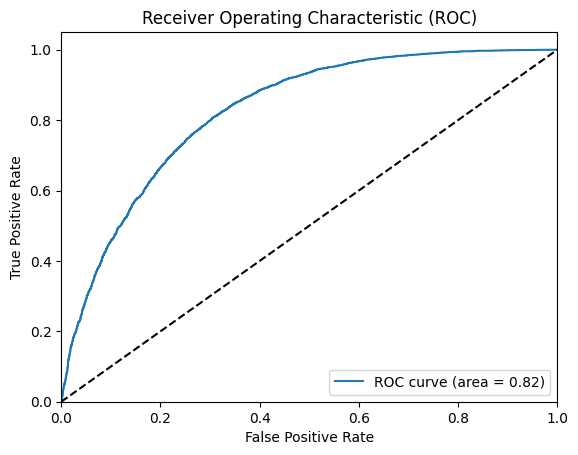

In [17]:
# Predicted probabilities (obtained using predict_proba in logistic regression)
y_pred_proba = best_model_log.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# AUC value
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (for random classification)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


          Log Loss (və ya Logarithmic Loss)
          
          Əhəmiyyəti:
          Proqnozun dəqiqliyini ölçür: Log Loss modeli ehtimallara əsasən qiymətləndirir. Model hansısa sinifin ehtimalını gerçək sinfə nə qədər yaxın proqnozlaşdırırsa, o qədər yaxşıdır.
          Daha Dəqiq Proqnozlar: Yalnız düzgün sinfi təxmin etmək kifayət deyil, modelin hansı dərəcədə inamla düzgün sinfi təxmin etdiyi də vacibdir. Məsələn, doğru sinfi 0.9 ehtimalı ilə tapmaq, onu 0.6 ehtimalı ilə tapmaqdan daha yaxşıdır.

          Sərt cəzalar: Modelin verdiyi yanlış ehtimal dəyərlərinə görə cəza çox böyüyür. Məsələn, yanlış proqnozda ehtimalın 0.1 olması 0.49 ehtimalından daha çox zərər gətirir.
          Modelin "confidence" dərəcəsini qiymətləndirir: Yalnız sinifin doğru olub-olmamasına baxmaq əvəzinə, modelin proqnozlarının nə qədər əmin olduğunu yoxlayır.

          Metrikin Dəyəri:
          Kiçik dəyər daha yaxşı proqnozlar deməkdir, çünki model düzgün sinifə yüksək ehtimal verir.
          Yüksək dəyər isə modelin yanlış siniflər üçün yüksək ehtimal verdiyi mənasını daşıyır, bu isə pis performans göstəricisidir.

In [18]:
# LOG LOSS
loss = log_loss(y_test, y_pred_proba)

print(f'Log Loss: {loss}')

Log Loss: 0.5120807404704523


In [21]:
# Model coefficients (log-odds)
coefficients = best_model_log.coef_[0]
odds_ratios = np.exp(abs(coefficients))

# Combine coefficients and feature names into a list
coeff_feature_pairs = [(feature_names[i], coefficients[i]) for i in range(len(feature_names))]

# Sort by coefficients in descending order
coeff_feature_pairs_sorted = sorted(coeff_feature_pairs, key=lambda x: x[1], reverse=True)

# Convert the sorted results into a DataFrame
df_coefs = pd.DataFrame(coeff_feature_pairs_sorted, columns=['Feature', 'Coefficient'])
print('#'*20 , 'Coefficients' , '#'*20, '\n'*2, df_coefs, '\n')

# odds ratio
odds_feature_pairs = [(feature_names[i], abs(odds_ratios[i])) for i in range(len(feature_names))]
odds_feature_pairs_sorted = sorted(odds_feature_pairs, key=lambda x: x[1], reverse=True)

print('#'*20 , 'odds ratio' , '#'*20, '\n')
df_odds = pd.DataFrame(odds_feature_pairs_sorted, columns=['Feature', 'odds ratio'])
print(df_odds)


#################### Coefficients #################### 

                  Feature  Coefficient
0                GenHlth     1.136717
1              CholCheck     1.093268
2                 HighBP     0.757499
3                    Age     0.593986
4                    BMI     0.566476
5               HighChol     0.561636
6                    Sex     0.263253
7   HeartDiseaseorAttack     0.209320
8                 Stroke     0.140430
9               DiffWalk     0.112557
10         AnyHealthcare     0.028919
11                Smoker     0.000000
12           NoDocbcCost    -0.004915
13              MentHlth    -0.008248
14                Fruits    -0.027273
15          PhysActivity    -0.033102
16              PhysHlth    -0.036524
17               Veggies    -0.052432
18             Education    -0.059690
19                Income    -0.237368
20     HvyAlcoholConsump    -0.711341 

#################### odds ratio #################### 

                 Feature  odds ratio
0           

In [ ]:
# import pickle
# # Save the model using pickle
# with open('model_log.pkl', 'wb') as file:
#     pickle.dump(model_log, file)

# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

Decision tree

In [ ]:
# Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Hyperparameter options
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    #'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV model (with 5-fold cross-validation)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Performance of the best model on the test set
best_model_dt = grid_search.best_estimator_

y_pred_dt = best_model_dt.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# Performance of the best model on the training set
y_pred_train_dt = best_model_dt.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train_dt))
confusion_matrix(y_train, y_pred_train_dt)



Ən yaxşı hiperparametrlər: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      7090
           1       0.68      0.83      0.75      7049

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139

[[4395 2695]
 [1226 5823]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68     28256
           1       0.68      0.83      0.74     28297

    accuracy                           0.72     56553
   macro avg       0.73      0.72      0.71     56553
weighted avg       0.73      0.72      0.71     56553



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[17148, 11108],
       [ 4931, 23366]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


AUC: 0.7829


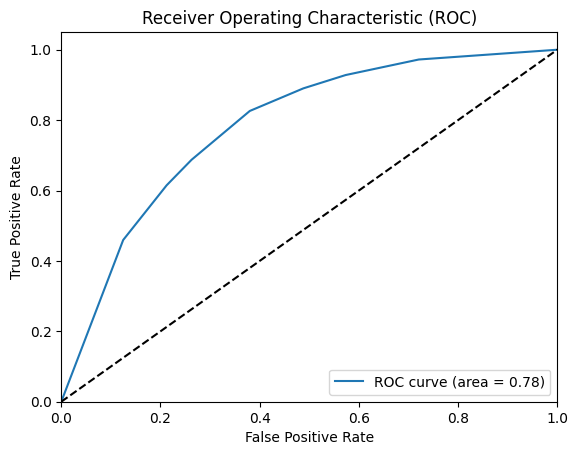

In [ ]:
# Predicted probabilities (obtained using predict_proba in decision tree)
y_pred_proba = best_model_dt.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# AUC value
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# LOG LOSS
loss = log_loss(y_test, y_pred_proba)

print(f'Log Loss: {loss}')

Log Loss: 0.5541356348750358


In [ ]:
feature_importances = best_model_dt.feature_importances_
odds_ratios = np.exp(abs(feature_importances))

coeff_feature_pairs = [(feature_names[i], feature_importances[i]) for i in range(len(feature_names))]

coeff_feature_pairs_sorted = sorted(coeff_feature_pairs, key=lambda x: x[1], reverse=True)

df_coefs = pd.DataFrame(coeff_feature_pairs_sorted, columns=['Feature', 'Coefficient'])
print('#'*20 , 'Coefficients' , '#'*20, '\n'*2, df_coefs, '\n')

odds_feature_pairs = [(feature_names[i], abs(odds_ratios[i])) for i in range(len(feature_names))]
odds_feature_pairs_sorted = sorted(odds_feature_pairs, key=lambda x: x[1], reverse=True)

print('#'*20 , 'odds ratio' , '#'*20, '\n')
df_odds = pd.DataFrame(odds_feature_pairs_sorted, columns=['Feature', 'odds ratio'])
print(df_odds)


#################### Coefficients #################### 

                  Feature  Coefficient
0                 HighBP     0.554110
1                GenHlth     0.322563
2                    Age     0.066921
3                    BMI     0.056406
4               HighChol     0.000000
5              CholCheck     0.000000
6                 Smoker     0.000000
7                 Stroke     0.000000
8   HeartDiseaseorAttack     0.000000
9           PhysActivity     0.000000
10                Fruits     0.000000
11               Veggies     0.000000
12     HvyAlcoholConsump     0.000000
13         AnyHealthcare     0.000000
14           NoDocbcCost     0.000000
15              MentHlth     0.000000
16              PhysHlth     0.000000
17              DiffWalk     0.000000
18                   Sex     0.000000
19             Education     0.000000
20                Income     0.000000 

#################### odds ratio #################### 

                 Feature  odds ratio
0           

XGboost

In [ ]:
# Model
model = XGBClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Performance of the best model on the test set
best_model_xg = grid_search.best_estimator_

y_pred_xg = best_model_xg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xg))
print(confusion_matrix(y_test, y_pred_xg))

# Performance of the best model on the training set
y_pred_train_xg = best_model_xg.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train_xg))
confusion_matrix(y_train, y_pred_train_xg)


Ən yaxşı hiperparametrlər: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      7090
           1       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

[[5022 2068]
 [1418 5631]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74     28256
           1       0.73      0.80      0.77     28297

    accuracy                           0.75     56553
   macro avg       0.76      0.75      0.75     56553
weighted avg       0.76      0.75      0.75     56553



array([[19960,  8296],
       [ 5568, 22729]])

In [ ]:
df1 = pd.DataFrame(X_train_scaled)
df1.columns = X_train.columns
df1.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,-1.0,0.0,-0.50,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.5,0.0,0.6,0.0,1.0,0.50,-0.5,0.00
1,0.0,0.0,0.0,-0.25,1.0,0.0,1.0,-1.0,-1.0,-1.0,...,0.0,0.0,1.0,0.0,6.0,1.0,0.0,0.50,-0.5,-1.00
2,-1.0,-1.0,0.0,-0.75,1.0,0.0,0.0,0.0,-1.0,-1.0,...,0.0,0.0,-0.5,0.0,0.0,0.0,1.0,-2.00,-0.5,0.50
3,-1.0,0.0,0.0,-0.50,0.0,0.0,0.0,0.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.25
4,0.0,-1.0,0.0,0.75,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,-0.5,0.0,0.0,0.0,1.0,0.25,0.5,0.50


AUC: 0.8324


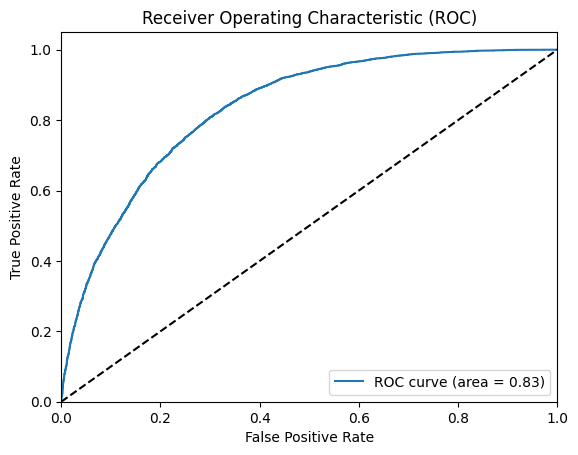

In [ ]:
y_pred_proba = best_model_xg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.4f}")

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# LOG LOSS
loss = log_loss(y_test, y_pred_proba)

print(f'Log Loss: {loss}')

Log Loss: 0.4986908943897326


In [ ]:
# Model feature importances (log-odds)
feature_importances = best_model_xg.feature_importances_
odds_ratios = np.exp(abs(feature_importances))

# Combine feature_importances and feature names into a list
coeff_feature_pairs = [(feature_names[i], feature_importances[i]) for i in range(len(feature_names))]

# Sort by feature importances in descending order
coeff_feature_pairs_sorted = sorted(coeff_feature_pairs, key=lambda x: x[1], reverse=True)

# Convert the sorted results into a DataFrame
df_coefs = pd.DataFrame(coeff_feature_pairs_sorted, columns=['Feature', 'Coefficient'])
print('#'*20 , 'Coefficients' , '#'*20, '\n'*2, df_coefs, '\n')
# print(df_coefs, '\n')

# odds ratio
odds_feature_pairs = [(feature_names[i], abs(odds_ratios[i])) for i in range(len(feature_names))]
odds_feature_pairs_sorted = sorted(odds_feature_pairs, key=lambda x: x[1], reverse=True)

print('#'*20 , 'odds ratio' , '#'*20, '\n')
df_odds = pd.DataFrame(odds_feature_pairs_sorted, columns=['Feature', 'odds ratio'])
print(df_odds)


#################### Coefficients #################### 

                  Feature  Coefficient
0                 HighBP     0.631086
1                GenHlth     0.091180
2               HighChol     0.080801
3                    Age     0.032851
4                    BMI     0.031309
5   HeartDiseaseorAttack     0.026895
6               DiffWalk     0.021999
7      HvyAlcoholConsump     0.017667
8              CholCheck     0.016672
9                 Income     0.011080
10                   Sex     0.010197
11                Stroke     0.004417
12             Education     0.003163
13              MentHlth     0.002969
14              PhysHlth     0.002813
15                Smoker     0.002653
16          PhysActivity     0.002586
17                Fruits     0.002561
18               Veggies     0.002526
19         AnyHealthcare     0.002458
20           NoDocbcCost     0.002118 

#################### odds ratio #################### 

                 Feature  odds ratio
0           

In [ ]:
import pickle
# Save the model using pickle
with open('best_model_xg.pkl', 'wb') as file:
    pickle.dump(best_model_xg, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

ANN

Epoch 1/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6460 - loss: 0.6994 - val_accuracy: 0.7477 - val_loss: 0.5743
Epoch 2/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7422 - loss: 0.5682 - val_accuracy: 0.7473 - val_loss: 0.5419
Epoch 3/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7473 - loss: 0.5408 - val_accuracy: 0.7472 - val_loss: 0.5301
Epoch 4/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7481 - loss: 0.5317 - val_accuracy: 0.7479 - val_loss: 0.5242
Epoch 5/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7436 - loss: 0.5291 - val_accuracy: 0.7469 - val_loss: 0.5199
Epoch 6/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7467 - loss: 0.5242 - val_accuracy: 0.7491 - val_loss: 0.5186
Epoch 7/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7470 - loss: 0.5207 - val_accuracy: 0.7513 - val_loss: 0.5159
Epoch 8/100
884/884 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7467 - loss: 0.5219 - val_accu

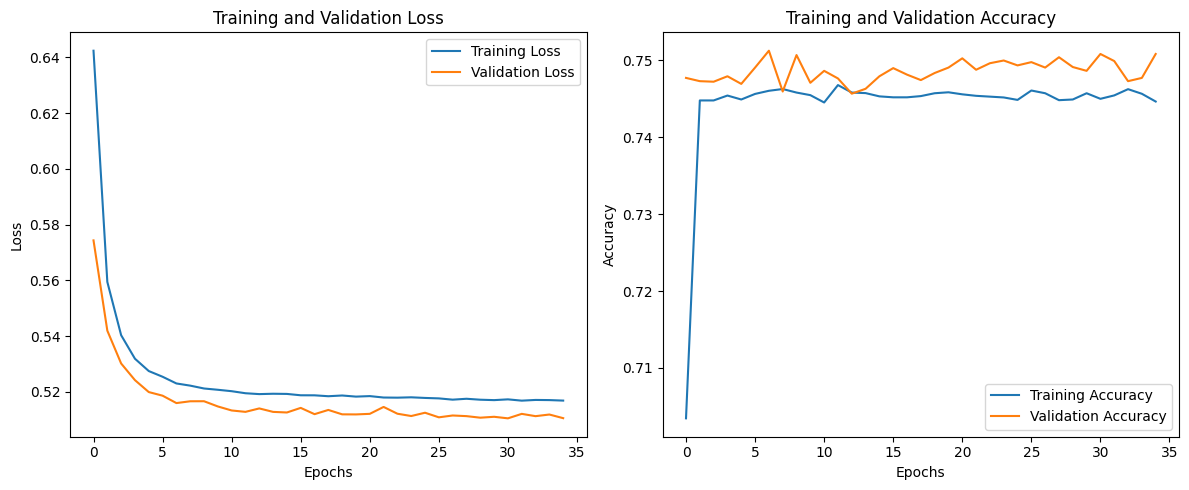

In [24]:
# Model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.weights.h5', save_best_only=True, monitor='val_loss', save_weights_only=True) # Save only weights in HDF5 format

history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping, model_checkpoint])


plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
